In [1]:
import mne
mne.set_log_level('WARNING')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import utils
from utils import compg, compl, time_idx
import pickle
from cycler import cycler

In [2]:
ldic = {'d': 'δ',
        'th': 'θ',
        'a': 'α',
        'b': 'β',
        'g': 'γ',
        'hg': 'High γ'}

## Coronal stop neutralization pattern

(796, 120, 305) (183, 120, 305) (79, 120, 305)


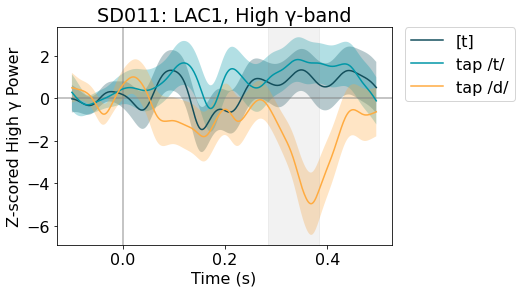

In [3]:
# for phonological comparison
subj, ses = 'SD011', '01'
ch = 'LAC1'
band='hg'

t_eps = mne.read_epochs('Figure2/small_t-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
dxt_eps = mne.read_epochs('Figure2/dxt-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
dxd_eps = mne.read_epochs('Figure2/dxd-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))

print(np.shape(t_eps),np.shape(dxt_eps),np.shape(dxd_eps))

file_id = 'sub-%s_ses-%s_task-PassiveListen_erp-stats.pkl'%(subj,ses)
dic_t_dxt = pickle.load(open('Figure2/t-vs-dxt_%s'%file_id,"rb"))
dic_t_dxd = pickle.load(open('Figure2/t-vs-dxd_%s'%file_id,"rb"))
dic_dxt_dxd = pickle.load(open('Figure2/dxt-vs-dxd_%s'%file_id,"rb"))

t1=time_idx(dic_t_dxt, 0)
t2=time_idx(dic_t_dxt, 0.5)
t3=time_idx(dic_t_dxt, -0.1)

sig_ch = []
a = 0.05
t0 = [x[0] for x in dic_t_dxt[ch]['p']]
tx0 = [x[0] for x in dic_t_dxd[ch]['p']]
x0 = [x[0] for x in dic_dxt_dxd[ch]['p']]

# true if [t] and tap-/t/ pattern together, [t] and tap-/d/ diverge, and tap-/t/ and tap-/d/ diverge
sig_times = [1 if x==y==z==True and t2>=i>t1 else 0 for i, (x,y,z) in enumerate(zip(compg(t0,a),compl(tx0,a),compl(x0,a)))]

plt.rc('axes', prop_cycle=(cycler('color', ['#134f5cff', '#0097a7ff', '#ffab40ff', 'y'])))
fig, ax = plt.subplots()

ax.axvline(x=0, c='grey', alpha=0.6)
ax.axhline(y=0, c='grey', alpha=0.6)

ll = 1/len(t0)
sig_minmax = []
for idx, t in enumerate(sig_times[t3:t2]):
    if t==1:
        sig_minmax.append(idx)
ax.axvspan(xmin=((sig_minmax[0]/len(t0[t3:t2]))*0.5)-0.05, xmax=((sig_minmax[-1]/len(t0[t3:t2]))*0.5)+0.05, color='grey', alpha=0.1)

utils.plot_zscore_evoked(t_eps, [ch], ax, label='[t]',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(dxt_eps, [ch], ax, label ='tap /t/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(dxd_eps, [ch], ax, label='tap /d/',tmin=-0.1, tmax=0.496)

ax.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
ax.set_ylabel('Z-scored %s Power'%ldic[band])
ax.set_xlabel('Time (s)')
ax.set_title('%s: %s, %s-band'%(subj,ch,ldic[band]))
plt.show()

(796, 120, 305) (183, 120, 305) (79, 120, 305)


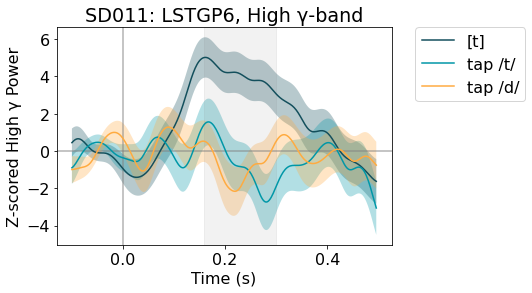

In [4]:
# for phonetic comparison
subj, ses = 'SD011', '01'
ch = 'LSTGP6'
band = 'hg'

t_eps = mne.read_epochs('Figure2/small_t-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
dxt_eps = mne.read_epochs('Figure2/dxt-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
dxd_eps = mne.read_epochs('Figure2/dxd-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))

print(np.shape(t_eps),np.shape(dxt_eps),np.shape(dxd_eps))

file_id = 'sub-%s_ses-%s_task-PassiveListen_erp-stats.pkl'%(subj,ses)
dic_t_dxt = pickle.load(open('Figure2/t-vs-dxt_%s'%file_id,"rb"))
dic_t_dxd = pickle.load(open('Figure2/t-vs-dxd_%s'%file_id,"rb"))
dic_dxt_dxd = pickle.load(open('Figure2/dxt-vs-dxd_%s'%file_id,"rb"))

t1=time_idx(dic_t_dxt, 0)
t2=time_idx(dic_t_dxt, 0.5)
t3=time_idx(dic_t_dxt, -0.1)

a = 0.05
t0 = [x[0] for x in dic_t_dxt[ch]['p']]
tx0 = [x[0] for x in dic_t_dxd[ch]['p']]
x0 = [x[0] for x in dic_dxt_dxd[ch]['p']]

# true if [t] and tap-/t/ diverge, [t] and tap-/d/ diverge, and tap-/t/ and tap-/d/ pattern together
sig_times = [1 if x==y==z==True and t2>=i>t1 else 0 for i, (x,y,z) in enumerate(zip(compl(t0,a),compl(tx0,a),compg(x0,a)))]

plt.rc('axes', prop_cycle=(cycler('color', ['#134f5cff', '#0097a7ff', '#ffab40ff', 'y'])))
fig, ax = plt.subplots()

ax.axvline(x=0, c='grey', alpha=0.6)
ax.axhline(y=0, c='grey', alpha=0.6)

ll = 1/len(t0)
sig_minmax = []
for idx, t in enumerate(sig_times[t3:t2]):
    if t==1:
        sig_minmax.append(idx)
ax.axvspan(xmin=((sig_minmax[0]/len(t0[t3:t2]))*0.5)-0.05, xmax=((sig_minmax[-1]/len(t0[t3:t2]))*0.5)+0.05, color='grey', alpha=0.1)

utils.plot_zscore_evoked(t_eps, [ch], ax, label='[t]',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(dxt_eps, [ch], ax, label ='tap /t/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(dxd_eps, [ch], ax, label='tap /d/',tmin=-0.1, tmax=0.496)

ax.legend(bbox_to_anchor=(1.4,1), borderaxespad=0)
ax.set_ylabel('Z-scored %s Power'%ldic[band])
ax.set_xlabel('Time (s)')
ax.set_title('%s: %s, %s-band'%(subj,ch,ldic[band]))
plt.show()

# Plural pattern

(51, 232, 305) (105, 232, 305) (194, 232, 305)


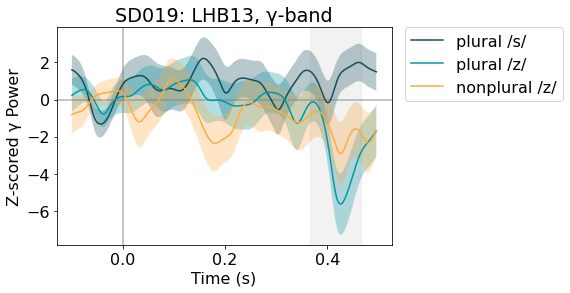

In [5]:
# for acoustic comparison /z/
subj, ses = 'SD019', '01'
ch = 'LHB13'
band = 'g'

pls_eps = mne.read_epochs('Figure2/pls-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
plz_eps = mne.read_epochs('Figure2/plz-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
nplz_eps = mne.read_epochs('Figure2/nplz-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
print(np.shape(pls_eps),np.shape(plz_eps),np.shape(nplz_eps))

file_id = 'sub-%s_ses-%s_task-PassiveListen_erp-stats.pkl'%(subj,ses)
dic_zz = pickle.load(open('Figure2/plz-vs-nplz_%s'%file_id,"rb"))
dic_zs = pickle.load(open('Figure2/pls-vs-plz_%s'%file_id,"rb"))
dic_nsz = pickle.load(open('Figure2/pls-vs-nplz_%s'%file_id,"rb"))

t1=time_idx(dic_zz, 0)
t2=time_idx(dic_zz, 0.5)
t3=time_idx(dic_zz, -0.1)

a = 0.05
zz0 = [x[0] for x in dic_zz[ch]['p']]
zs0 = [x[0] for x in dic_zs[ch]['p']]
nsz0=[x[0] for x in dic_nsz[ch]['p']]

# true if word final [z] and plural /z/ pattern together, [z] and plural /s/ diverge, and plural /z/ and plural /s/ diverge
sig_times = [1 if x==y==z==True and t2>=i>t1 else 0 for i, (x,y,z) in enumerate(zip(compg(zz0,a),compl(nsz0,a),compl(zs0,a)))]

plt.rc('axes', prop_cycle=(cycler('color', ['#134f5cff', '#0097a7ff', '#ffab40ff', 'y'])))
fig, ax = plt.subplots()

ax.axvline(x=0, c='grey', alpha=0.6)
ax.axhline(y=0, c='grey', alpha=0.6)
        
ll = 1/len(zz0)
sig_minmax = []
for idx, t in enumerate(sig_times[t3:t2]):
    if t==1:
        sig_minmax.append(idx)
ax.axvspan(xmin=((sig_minmax[0]/len(zz0[t3:t2]))*0.5)-0.05, xmax=((sig_minmax[-1]/len(zz0[t3:t2]))*0.5)+0.05, color='grey', alpha=0.1)

utils.plot_zscore_evoked(pls_eps, [ch], ax, label='plural /s/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(plz_eps, [ch], ax, label ='plural /z/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(nplz_eps, [ch], ax, label ='nonplural /z/',tmin=-0.1, tmax=0.496)

ax.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
ax.set_ylabel('Z-scored %s Power'%ldic[band])
ax.set_xlabel('Time (s)')
ax.set_title('%s: %s, %s-band'%(subj,ch,ldic[band]))
plt.show()

(51, 232, 305) (105, 232, 305) (194, 232, 305)


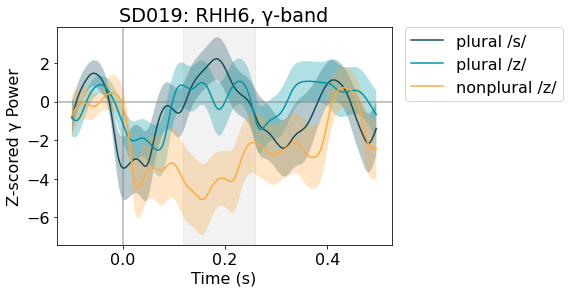

In [6]:
# for morphological comparison /z/
band = 'g'
subj, ses = 'SD019', '01'
ch = 'RHH6'

pls_eps = mne.read_epochs('Figure2/pls-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
plz_eps = mne.read_epochs('Figure2/plz-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
nplz_eps = mne.read_epochs('Figure2/nplz-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
print(np.shape(pls_eps),np.shape(plz_eps),np.shape(nplz_eps))

file_id = 'sub-%s_ses-%s_task-PassiveListen_erp-stats.pkl'%(subj,ses)
dic_zz = pickle.load(open('Figure2/plz-vs-nplz_%s'%file_id,"rb"))
dic_zs = pickle.load(open('Figure2/pls-vs-plz_%s'%file_id,"rb"))
dic_nsz = pickle.load(open('Figure2/pls-vs-nplz_%s'%file_id,"rb"))

t1=time_idx(dic_zz, 0)
t2=time_idx(dic_zz, 0.5)
t3=time_idx(dic_zz, -0.1)

a = 0.05
zz0 = [x[0] for x in dic_zz[ch]['p']]
zs0 = [x[0] for x in dic_zs[ch]['p']]
nsz0=[x[0] for x in dic_nsz[ch]['p']]

# true if word final [z] and plural /z/ diverge, [z] and plural /s/ diverge, and plural /z/ and plural /s/ pattern together
sig_times = [1 if x==y==z==True and t2>=i>t1 else 0 for i, (x,y,z) in enumerate(zip(compl(zz0,a),compl(nsz0,a),compg(zs0,a)))]

plt.rc('axes', prop_cycle=(cycler('color', ['#134f5cff', '#0097a7ff', '#ffab40ff', 'y'])))
fig, ax = plt.subplots()
ax.axvline(x=0, c='grey', alpha=0.6)
ax.axhline(y=0, c='grey', alpha=0.6)
        
ll = 1/len(zz0)
sig_minmax = []
for idx, t in enumerate(sig_times[t3:t2]):
    if t==1:
        sig_minmax.append(idx)

ax.axvspan(xmin=((sig_minmax[0]/len(zz0[t3:t2]))*0.5)-0.05, xmax=((sig_minmax[-1]/len(zz0[t3:t2]))*0.5)+0.05, color='grey', alpha=0.1)

utils.plot_zscore_evoked(pls_eps, [ch], ax, label='plural /s/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(plz_eps, [ch], ax, label ='plural /z/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(nplz_eps, [ch], ax, label ='nonplural /z/',tmin=-0.1, tmax=0.496)

ax.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

ax.set_ylabel('Z-scored %s Power'%ldic[band])
ax.set_xlabel('Time (s)')
ax.set_title('%s: %s, %s-band'%(subj,ch,ldic[band]))
plt.show()

## Past tense pattern

(15, 144, 305) (52, 144, 305) (141, 144, 305)


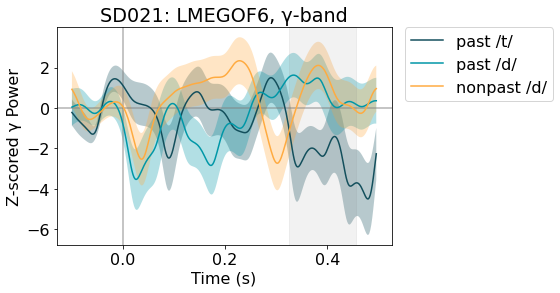

In [7]:
# for phonological comparison
subj, ses, band = 'SD021', '01', 'g'
ch = 'LMEGOF6'

pastt_eps = mne.read_epochs('Figure2/pastt-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
pastd_eps = mne.read_epochs('Figure2/pastd-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
npastd_eps = mne.read_epochs('Figure2/npastd-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
print(np.shape(pastt_eps),np.shape(pastd_eps),np.shape(npastd_eps))

file_id = 'sub-%s_ses-%s_task-PassiveListen_erp-stats.pkl'%(subj,ses)
dic_dd = pickle.load(open('Figure2/pastd-vs-npastd_%s'%file_id,"rb"))
dic_dt = pickle.load(open('Figure2/pastt-vs-pastd_%s'%file_id,"rb"))
dic_ndt = pickle.load(open('Figure2/pastt-vs-npastd_%s'%file_id,"rb"))

t1=time_idx(dic_dd, 0)
t2=time_idx(dic_dd, 0.5)
t3=time_idx(dic_dd, -0.1)

a = 0.05
dd0 = [x[0] for x in dic_dd[ch]['p']]
dt0 = [x[0] for x in dic_dt[ch]['p']]
ndt0=[x[0] for x in dic_ndt[ch]['p']]

# true if word final [d] and past /d/ pattern together, [d] and past /t/ diverge, and past /d/ and past /t/ diverge
sig_times = [1 if x==y==z==True and t2>=i>t1 else 0 for i, (x,y,z) in enumerate(zip(compg(dd0,a),compl(ndt0,a),compl(dt0,a)))]
plt.rc('axes', prop_cycle=(cycler('color', ['#134f5cff', '#0097a7ff', '#ffab40ff', 'y'])))#03bccf
fig, ax = plt.subplots()

ax.axvline(x=0, c='grey', alpha=0.6)
ax.axhline(y=0, c='grey', alpha=0.6)

ll = 1/len(dd0)
sig_minmax = []
for idx, t in enumerate(sig_times[t3:t2]):
    if t==1:
        sig_minmax.append(idx)
ax.axvspan(xmin=((sig_minmax[0]/len(dd0[t3:t2]))*0.5)-0.05, xmax=((sig_minmax[-1]/len(dd0[t3:t2]))*0.5)+0.04, color='grey', alpha=0.1)

utils.plot_zscore_evoked(pastt_eps, [ch], ax, label='past /t/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(pastd_eps, [ch], ax, label ='past /d/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(npastd_eps, [ch], ax, label ='nonpast /d/',tmin=-0.1, tmax=0.496)

ax.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

ax.set_ylabel('Z-scored %s Power'%ldic[band])
ax.set_xlabel('Time (s)')
ax.set_title('%s: %s, %s-band'%(subj,ch,ldic[band]))
plt.show()

(20, 120, 305) (53, 120, 305) (138, 120, 305)


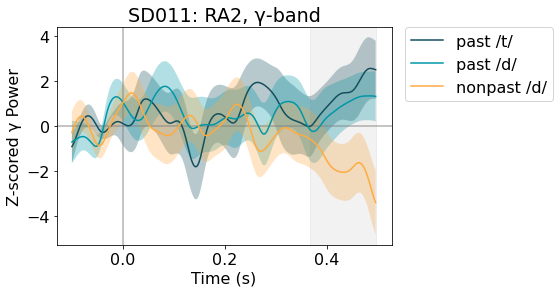

In [8]:
# for morphological comparison
subj, ses, band = 'SD011', '01', 'g'
ch = 'RA2'

pastt_eps = mne.read_epochs('Figure2/pastt-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
pastd_eps = mne.read_epochs('Figure2/pastd-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
npastd_eps = mne.read_epochs('Figure2/npastd-eps_sub-%s_band-%s_ch-%s-epo.fif'%(subj,band,ch))
print(np.shape(pastt_eps),np.shape(pastd_eps),np.shape(npastd_eps))

file_id = 'sub-%s_ses-%s_task-PassiveListen_erp-stats.pkl'%(subj,ses)
dic_dd = pickle.load(open('Figure2/pastd-vs-npastd_%s'%file_id,"rb"))
dic_dt = pickle.load(open('Figure2/pastt-vs-pastd_%s'%file_id,"rb"))
dic_ndt = pickle.load(open('Figure2/pastt-vs-npastd_%s'%file_id,"rb"))

t1=time_idx(dic_dd, 0)
t2=time_idx(dic_dd, 0.5)
t3=time_idx(dic_dd, -0.1)

a = 0.05
dd0 = [x[0] for x in dic_dd[ch]['p']]
dt0 = [x[0] for x in dic_dt[ch]['p']]
ndt0=[x[0] for x in dic_ndt[ch]['p']]

# true if word final [d] and past /d/ diverge, [d] and past /t/ diverge, and past /d/ and past /t/ pattern together
sig_times = [1 if x==y==z==True and t2>=i>t1 else 0 for i, (x,y,z) in enumerate(zip(compl(dd0,a),compl(ndt0,a),compg(dt0,a)))]
plt.rc('axes', prop_cycle=(cycler('color', ['#134f5cff', '#0097a7ff', '#ffab40ff', 'y'])))
fig, ax = plt.subplots()

ax.axvline(x=0, c='grey', alpha=0.6)
ax.axhline(y=0, c='grey', alpha=0.6)

ll = 1/len(dd0)
sig_minmax = []
for idx, t in enumerate(sig_times[t3:t2]):
    if t==1:
        sig_minmax.append(idx)
ax.axvspan(xmin=((sig_minmax[0]/len(dd0[t3:t2]))*0.5)-0.05, xmax=((sig_minmax[-1]/len(dd0[t3:t2]))*0.5)+0.039, color='grey', alpha=0.1)

utils.plot_zscore_evoked(pastt_eps, [ch], ax, label='past /t/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(pastd_eps, [ch], ax, label ='past /d/',tmin=-0.1, tmax=0.496)
utils.plot_zscore_evoked(npastd_eps, [ch], ax, label ='nonpast /d/',tmin=-0.1, tmax=0.496)

ax.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

ax.set_ylabel('Z-scored %s Power'%ldic[band])
ax.set_xlabel('Time (s)')
ax.set_title('%s: %s, %s-band'%(subj,ch,ldic[band]))
plt.show()